In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [10]:
df = pd.read_csv("traffic_data.csv")
df.head()

,Date,Hour,Vehicle_Count
0,2025-08-01,0,135
1,2025-08-01,1,158
2,2025-08-01,2,178
3,2025-08-01,3,127
4,2025-08-01,4,79


In [11]:
df['Datetime'] = pd.to_datetime(df['Date'] + " " + df['Hour'].astype(str) + ":00")

In [12]:
print("Dataset shape:", df.shape)

Dataset shape: (500, 4)


 Traffic Over Time (Line Plot)

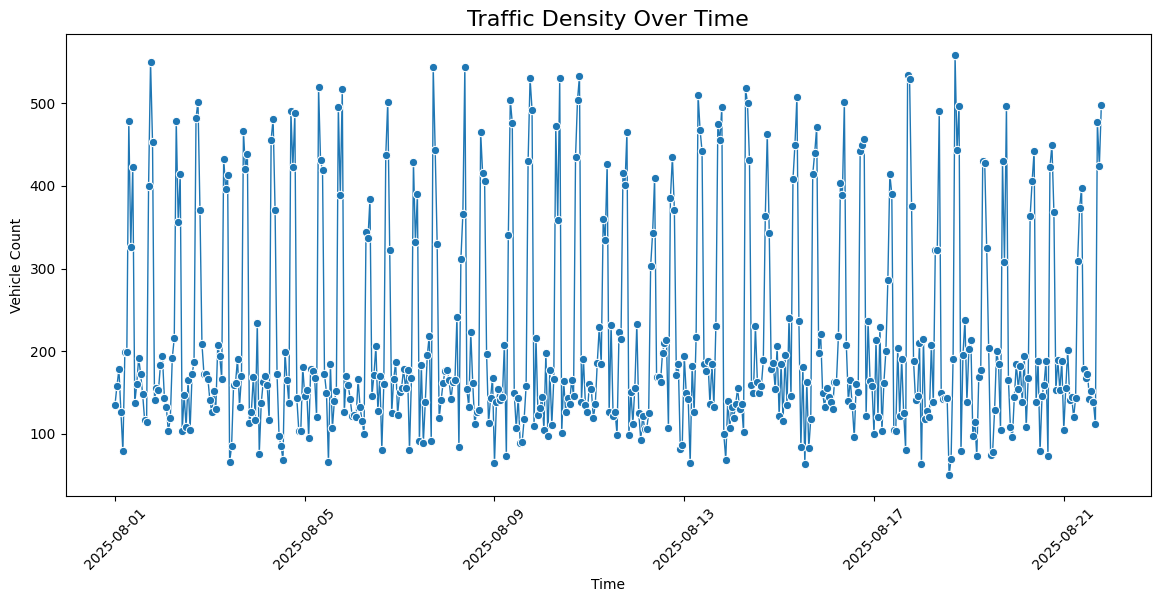

In [13]:
plt.figure(figsize=(14,6))
sns.lineplot(x='Datetime', y='Vehicle_Count', data=df, marker='o', linewidth=1)
plt.title("Traffic Density Over Time", fontsize=16)
plt.xlabel("Time")
plt.ylabel("Vehicle Count")
plt.xticks(rotation=45)
plt.show()

 Average Traffic by Hour of Day (Bar Plot)

/tmp/ipython-input-1275590907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_avg.index, y=hourly_avg.values, palette="viridis")


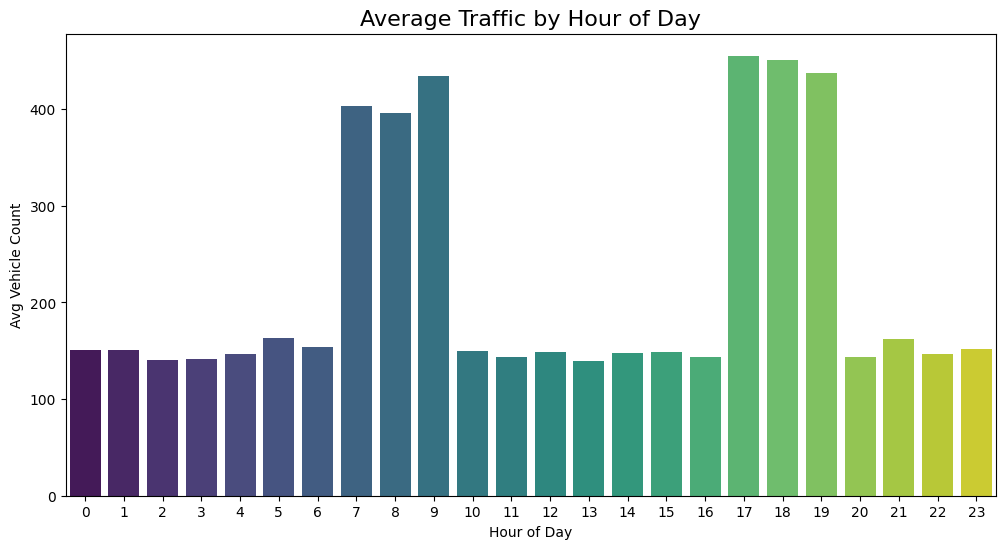

In [14]:
hourly_avg = df.groupby('Hour')['Vehicle_Count'].mean()

plt.figure(figsize=(12,6))
sns.barplot(x=hourly_avg.index, y=hourly_avg.values, palette="viridis")
plt.title("Average Traffic by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Avg Vehicle Count")
plt.show()

Detect Daily Peaks (Max traffic each day)

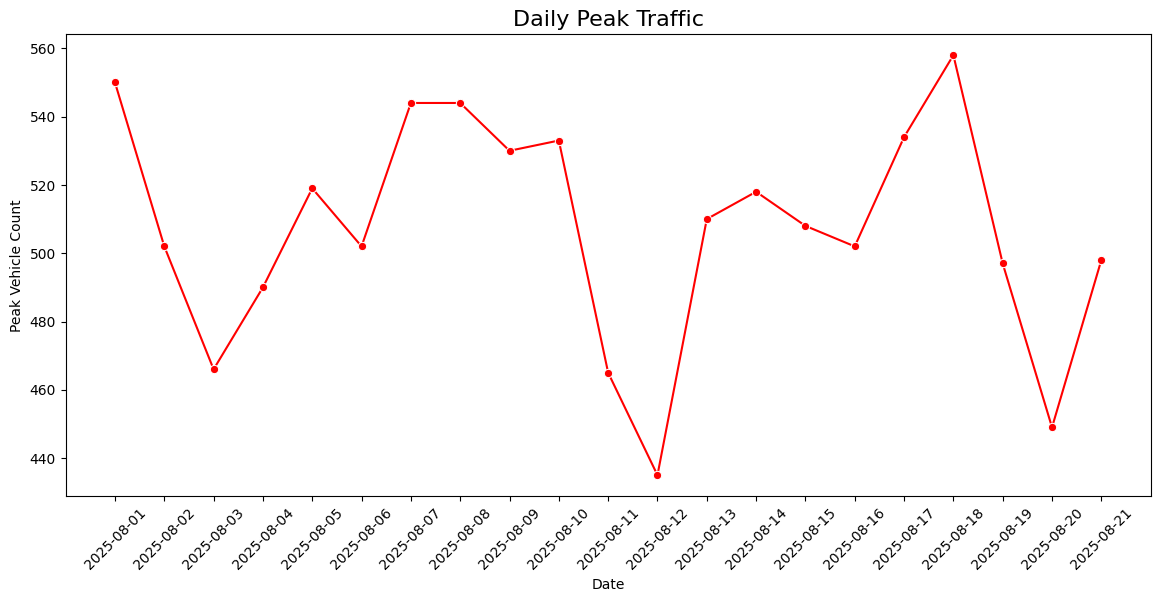

In [15]:
daily_peaks = df.groupby('Date')['Vehicle_Count'].max()

plt.figure(figsize=(14,6))
sns.lineplot(x=daily_peaks.index, y=daily_peaks.values, marker='o', color='red')
plt.title("Daily Peak Traffic", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Peak Vehicle Count")
plt.xticks(rotation=45)
plt.show()

Simple Prediction
WE are using Linear Regression to predict traffic by hour

In [16]:
X = df['Hour'].values.reshape(-1,1)
y = df['Vehicle_Count'].values

model = LinearRegression()
model.fit(X,y)

LinearRegression()

Predicting for each hour

In [17]:
hours = np.arange(0,24).reshape(-1,1)
predictions = model.predict(hours)

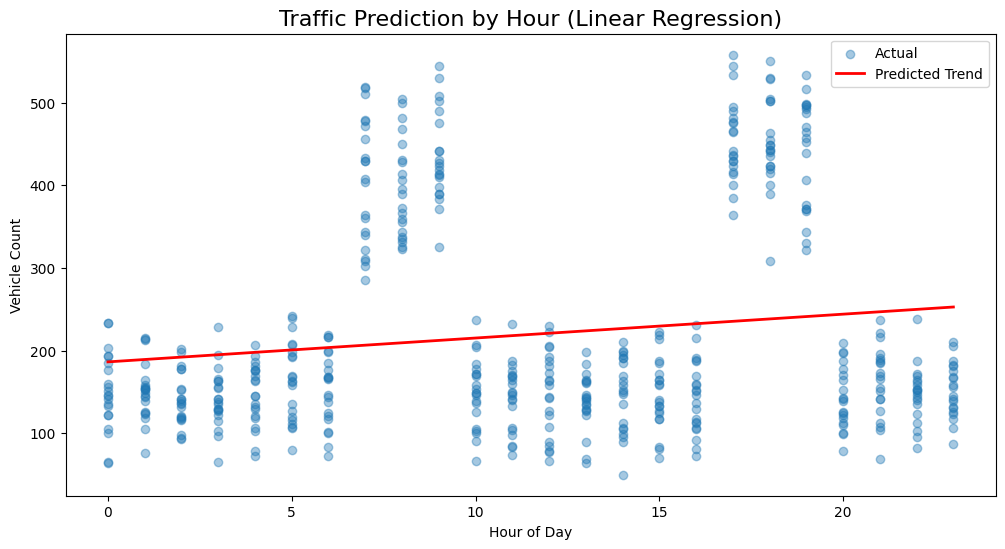

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(df['Hour'], df['Vehicle_Count'], alpha=0.4, label="Actual")
plt.plot(hours, predictions, color="red", linewidth=2, label="Predicted Trend")
plt.title("Traffic Prediction by Hour (Linear Regression)", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Vehicle Count")
plt.legend()
plt.show()